In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json
import math

In [4]:
dataset = "superconduct"

{'1': [2, 0.5439574807143206], '2': [6, 0.6385768806974637], '3': [50, 0.6858133329098313], '4': [410, 0.7298399124400013], '5': [2544, 0.762448930123022], '6': [14646, 0.8063220655793365], '7': [71576, 0.8386556918665814], '8': [308622, 0.8621423604542439], '9': [1183427, 0.8819397940889941], '10': [4083523, 0.8956290935737592], '11': [12784812, 0.9043843550837264], '12': [35198139, 0.9108665057368501]}


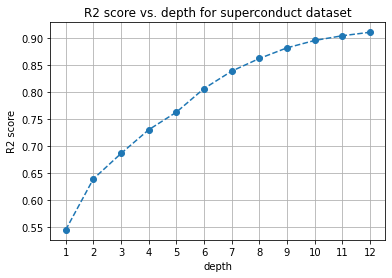

In [55]:
with open(f"../random_forest_builder/scores_{dataset}.json", "r") as f:
    data = json.loads(f.read())
    print(data)
x, y = [], []
for depth, [k, r2] in data.items():
    x.append(depth)
    y.append(r2)
fig, ax = plt.subplots()
ax.set_ylabel("R2 score")
ax.set_xlabel("depth")
ax.plot(x, y, "--o")
ax.xaxis.grid()
ax.yaxis.grid()
ax.set_title(f"R2 score vs. depth for {dataset} dataset")
plt.savefig(f"plots/{dataset}_R2", dpi=300)
plt.show()


In [16]:
n=40
no_trees=20

In [33]:
# Proximal method
result_cs = {}
for depth in range(2,5):
    result_cs[depth] = []
    for C in np.linspace(0.1, 1.4, 10):
        for lmda_i, lmda in enumerate(10 ** np.linspace(-5,2,8)):
            try:
                f =open(f"../results/cs/{dataset}_n={n}_no_trees={no_trees}_depth={depth}_C={C:.3}_lambda={lmda:.6}.json")
                data = json.loads(f.read())
                # print(data)
                result_cs[depth].append((data["measurements"], data["mse"]/data['true_fourier_norm_squared'], data["C"], data["lambda"], data["optimization_time"]))
            except:
                print(f"Couldn't find results/{dataset}_n={n}_no_trees={no_trees}_depth={depth}_C={C:.3}_lambda={lmda:.6}.json")

{'n': 40, 'no_trees': 20, 'depth': 2, 'C': 0.1, 'lambda': 1e-05, 'k': 6, 'sampling_time': 0.057585716247558594, 'optimization_time': 0.24843978881835938, 'equality': False, 'mse': 1396.0369898545903, 'true_fourier_norm_squared': 1398.858724321689, 'computed_fourier_norm_squared': 2.458206722049969, 'measurements': 6}
{'n': 40, 'no_trees': 20, 'depth': 2, 'C': 0.1, 'lambda': 0.0001, 'k': 6, 'sampling_time': 0.05781722068786621, 'optimization_time': 0.16988897323608398, 'equality': False, 'mse': 1392.0019422725265, 'true_fourier_norm_squared': 1398.858724321689, 'computed_fourier_norm_squared': 2.876529262685202, 'measurements': 6}
{'n': 40, 'no_trees': 20, 'depth': 2, 'C': 0.1, 'lambda': 0.001, 'k': 6, 'sampling_time': 0.07251930236816406, 'optimization_time': 0.05410146713256836, 'equality': False, 'mse': 1392.0010584692584, 'true_fourier_norm_squared': 1398.858724321689, 'computed_fourier_norm_squared': 2.878102373350917, 'measurements': 6}
{'n': 40, 'no_trees': 20, 'depth': 2, 'C': 0

depth 2
depth 3
depth 4


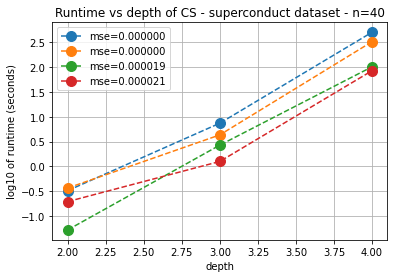

In [58]:
fig, ax = plt.subplots()
ax.set_ylabel("log10 of runtime (seconds)")
ax.set_xlabel("depth")
y1, y2, y3, y4 = [], [], [], []
x = [2,3,4]
for depth in range(2,5):
    print("depth", depth)
    for m, normalized_mse, C, lmbda, time in result_cs[depth]:
        if C==1.4 and lmbda ==0.001:
            y1.append(np.log10(time))
            y1_mse = normalized_mse
        if C==0.8222222222222221 and lmbda ==0.001:
            y2.append(np.log10(time))
            y2_mse = normalized_mse
        if C==1.4 and lmbda ==0.01:
            y3.append(np.log10(time))
            y3_mse = normalized_mse
        if C==0.8222222222222221 and lmbda ==0.01:
            y4.append(np.log10(time))
            y4_mse = normalized_mse
ax.plot(x, y1,'--o', markersize=10, label=f"mse={y1_mse:.6f}")
ax.plot(x, y2,'--o', markersize=10, label=f"mse={y2_mse:.6f}")
ax.plot(x, y3,'--o', markersize=10, label=f"mse={y3_mse:.6f}")
ax.plot(x, y4,'--o', markersize=10, label=f"mse={y4_mse:.6f}")

ax.xaxis.grid()
ax.yaxis.grid()
ax.legend()
ax.set_title(f"Runtime vs depth of CS - {dataset} dataset - n=40")
plt.savefig(f"plots/{dataset}_cs_runtimes", dpi=300)
plt.show()


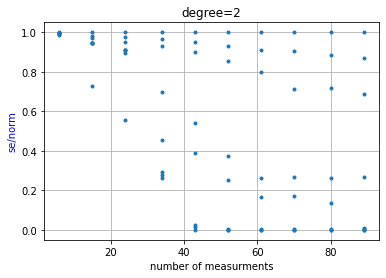

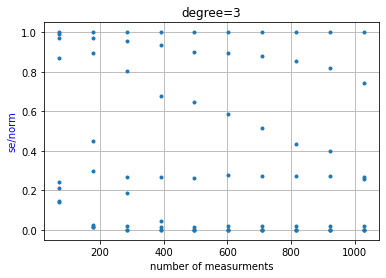

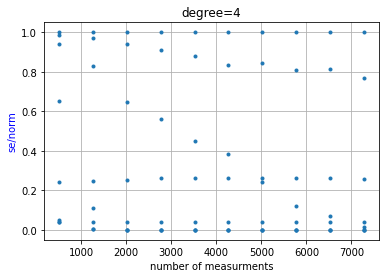

In [18]:
for depth in range(2,5):
    fig, ax = plt.subplots()
    ax.set_ylabel("se/norm", color="blue")
    ax.set_xlabel("number of measurments")
    ax.plot([a[0] for a in result_cs[depth]],[a[1] for a in result_cs[depth]],'.')
    ax.xaxis.grid()
    ax.yaxis.grid()
    ax.set_title(f"degree={depth}")
    #plt.savefig(f"images/random/n={n}_d={degree}", dpi=300)
    plt.show()


In [61]:
n=324
no_trees=20

In [79]:
# Reed-solomon method
result_reed_solomon = {}
for depth in range(2,8):
    print("depth=", depth)
    result_reed_solomon[depth] = []
    for C in np.linspace(0.6, 1.6, 6):
        for ratio in np.linspace(1.1,2.6,7):
            try:
                f =open(f"../results/reed_solomon/{dataset}_n={n}_no_trees={no_trees}_depth={depth}_C={C:.3}_ratio={ratio:.3}.json")
                data = json.loads(f.read())
                # print(data)
                normalized_mse = data["mse"]/data['true_fourier_norm_squared']
                if normalized_mse < 0.1:
                    print(data["C"], data["ratio"], normalized_mse, data["measurements"])
                result_reed_solomon[depth].append((data["measurements"], data["mse"]/data['true_fourier_norm_squared'],  data["C"], data["ratio"],  data["time_cached"]))
            except:
                print(f"Could not find {dataset}_n={n}_no_trees={no_trees}_depth={depth}_C={C:.3}_ratio={ratio:.3}.json")

depth= 2
0.6 1.1 0.016071458512447352 348
0.6 1.35 0.016071458512447352 232
0.8 1.1 0.016071458512447352 348
0.8 1.35 0.016071458512447352 348
1.0 1.1 1.8327783194914716e-32 696
1.0 1.35 1.8327783194914716e-32 580
1.0 1.6 1.8327783194914716e-32 348
1.0 1.85 1.8327783194914716e-32 232
1.0 2.1 1.8327783194914716e-32 232
1.0 2.35 1.8327783194914716e-32 232
1.2 1.1 1.8327783194914716e-32 696
1.2 1.35 1.8327783194914716e-32 696
1.2 1.6 1.8327783194914716e-32 580
1.2 1.85 1.8327783194914716e-32 348
1.2 2.1 1.8327783194914716e-32 232
1.2000000000000002 2.35 1.8327783194914716e-32 232
1.2000000000000002 2.6 1.8327783194914716e-32 232
1.4 1.1 1.8327783194914716e-32 696
1.4 1.35 1.8327783194914716e-32 696
1.4 1.6 1.8327783194914716e-32 580
1.4 1.85 1.8327783194914716e-32 464
1.4 2.1 1.8327783194914716e-32 232
1.4 2.35 1.8327783194914716e-32 232
1.4 2.6 1.8327783194914716e-32 232
1.6 1.1 7.472096225619077e-32 1392
1.6 1.35 7.472096225619077e-32 928
1.6 1.6 7.472096225619077e-32 812
1.6 1.85 7.472

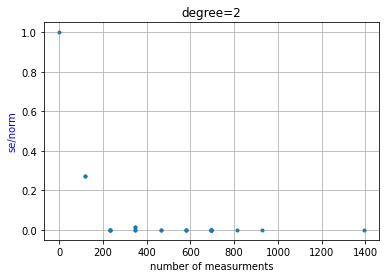

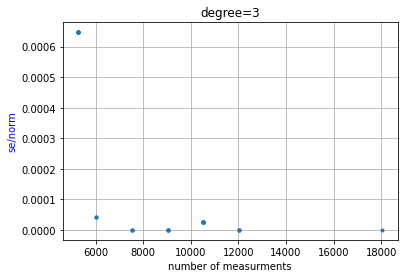

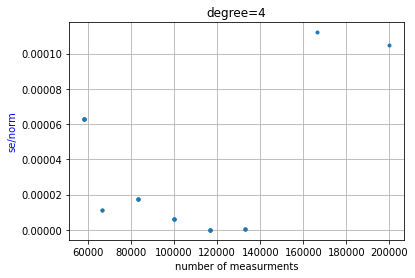

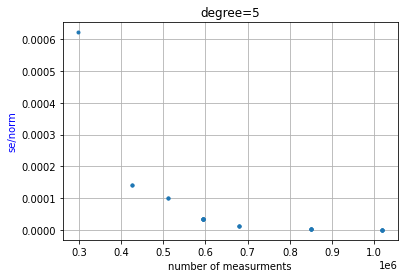

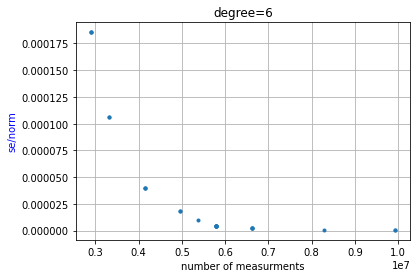

In [78]:
for depth in range(2,7):
    fig, ax = plt.subplots()
    ax.set_ylabel("se/norm", color="blue")
    ax.set_xlabel("number of measurments")
    ax.plot([a[0] for a in result_reed_solomon[depth]],[a[1] for a in result_reed_solomon[depth]],'.')
    ax.xaxis.grid()
    ax.yaxis.grid()
    ax.set_title(f"degree={depth}")
    #plt.savefig(f"images/random/n={n}_d={degree}", dpi=300)
    plt.show()


In [131]:
# Binning method
from math import ceil
result_binning = {}
for depth in range(2,5):
    result_binning[depth] = []
    for C in np.linspace(1,1.6,5):
        for ratio in np.linspace(1.1,2.1,5):
            # Iterations over the frequency recovery primitive
            cs_bins_range = np.linspace(0.1 * depth ** 2, depth ** 2, 10)
            cs_bins_range = [float(ceil(a)) for a in cs_bins_range]
            for cs_bins in cs_bins_range:
                for cs_iterations in [float(1), float(2), float(3), float(4)]:
                    for cs_ratio in [1.2, 1.3, 1.4, 1.5, 1.6]:
                        try:
                            f =open(f"../results/binning/{dataset}_n={n}_no_trees={no_trees}_depth={depth}_"
                                    f"C={C:.3}_ratio={ratio:.3}_csbins={cs_bins}_csiterations={cs_iterations}_"
                                    f"csratio={cs_ratio}.json")
                            data = json.loads(f.read())
                            if (data["mse"]/data['true_fourier_norm_squared'])>1  or (data["measurements"])>10000:
                                continue
                            result_binning[depth].append((data["measurements"], data["mse"]/data['true_fourier_norm_squared']))
                        except:
                            print(f"Could not find {dataset}_n={n}_no_trees={no_trees}_depth={depth}_"
                                    f"C={C:.3}_ratio={ratio:.3}_csbins={cs_bins}_csiterations={cs_iterations}_"
                                    f"csratio={cs_ratio}.json")

In [132]:
print(result_binning)

{2: [(1688, 1.6165736927676472e-32), (1672, 1.6592132890160518e-32), (1672, 1.7786041585115854e-32), (1664, 1.411903630775304e-32), (1680, 6.443908983040175e-33), (2648, 1.0281472645396608e-32), (2648, 1.0963706185371085e-32), (2616, 1.6592132890160518e-32), (2624, 1.7103808045141377e-32), (2648, 1.0281472645396608e-32), (3624, 1.0963706185371085e-32), (3584, 4.6956855368555786e-33), (3616, 1.6592132890160518e-32), (3576, 1.5227665810211565e-32), (3616, 0.002244237810814757), (4584, 7.083502926766248e-33), (4536, 0.32304230116572286), (4592, 0.0006412108030899326), (4544, 1.7274366430134995e-32), (4576, 6.443908983040175e-33), (1688, 1.6165736927676472e-32), (1672, 1.6592132890160518e-32), (1672, 1.7786041585115854e-32), (1664, 1.411903630775304e-32), (1680, 6.443908983040175e-33), (2648, 1.0281472645396608e-32), (2648, 1.0963706185371085e-32), (2616, 1.6592132890160518e-32), (2624, 1.7103808045141377e-32), (2648, 1.0281472645396608e-32), (3624, 1.0963706185371085e-32), (3584, 4.695685

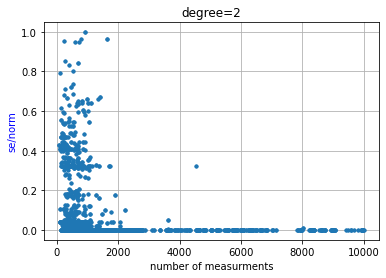

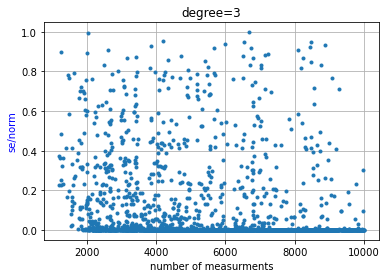

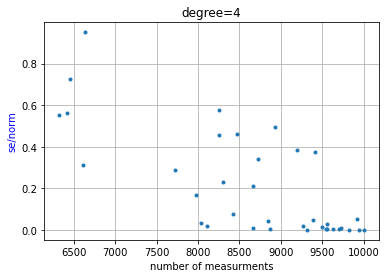

In [133]:
for depth in range(2,5):
    fig, ax = plt.subplots()
    ax.set_ylabel("se/norm", color="blue")
    ax.set_xlabel("number of measurments")
    ax.plot([a[0] for a in result_binning[depth]],[a[1] for a in result_binning[depth]],'.')
    ax.xaxis.grid()
    ax.yaxis.grid()
    ax.set_title(f"degree={depth}")
    #plt.savefig(f"images/random/n={n}_d={degree}", dpi=300)
    plt.show()

In [ ]:
# Random measurement method
from math import ceil
result_binning = {}
for depth in range(2,5):
    result_binning[depth] = []
    for C in np.linspace(1,1.6,5):
        for ratio in np.linspace(1.1,2.1,5):
            # Iterations over the frequency recovery primitive
            cs_bins_range = np.linspace(0.1 * depth ** 2, depth ** 2, 10)
            cs_bins_range = [float(ceil(a)) for a in cs_bins_range]
            for cs_bins in cs_bins_range:
                for cs_iterations in [float(1), float(2), float(3), float(4)]:
                    for cs_ratio in [1.2, 1.3, 1.4, 1.5, 1.6]:
                        try:
                            f =open(f"../results/binning/{dataset}_n={n}_no_trees={no_trees}_depth={depth}_"
                                    f"C={C:.3}_ratio={ratio:.3}_csbins={cs_bins}_csiterations={cs_iterations}_"
                                    f"csratio={cs_ratio}.json")
                            data = json.loads(f.read())
                            if (data["mse"]/data['true_fourier_norm_squared'])>1  or (data["measurements"])>10000:
                                continue
                            result_binning[depth].append((data["measurements"], data["mse"]/data['true_fourier_norm_squared']))
                        except:
                            print(f"Could not find {dataset}_n={n}_no_trees={no_trees}_depth={depth}_"
                                    f"C={C:.3}_ratio={ratio:.3}_csbins={cs_bins}_csiterations={cs_iterations}_"
                                    f"csratio={cs_ratio}.json")